# Question 1: Occupations

Step 1: Import the necessary libraries

In [1]:
# importing librariesq
import pandas as pd
import urllib

Step 2: Import the dataset from this address = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user".

Step 3: Assign it to a variable called users

In [2]:
#importing dataset and assigning to it variable called users
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4: Discover what is the mean age per occupation

In [3]:
# Finding out the mean age per occupation.
# Note: Here I am using round function to limit the decimal numbers in the Mean Value. So it become more meaningful and Ease to read.
round(users.groupby('occupation').age.mean(),1)

occupation
administrator    38.7
artist           31.4
doctor           43.6
educator         42.0
engineer         36.4
entertainment    29.2
executive        38.7
healthcare       41.6
homemaker        32.6
lawyer           36.8
librarian        40.0
marketing        37.6
none             26.6
other            34.5
programmer       33.1
retired          63.1
salesman         35.7
scientist        35.5
student          22.1
technician       33.1
writer           36.3
Name: age, dtype: float64

Step 5: Discover the Male ratio per occupation and sort it from the most to the least

In [4]:
male_ratio = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

total = male_ratio[['F', 'M']].sum(axis=1)
male_ratio['MaleRatio'] = round(100 * male_ratio['M'] / total,2) # Here i am rounding the value to 2 decimal places

male_ratio = male_ratio['MaleRatio'].sort_values(ascending=False) # ascending = False will arrange the data in decending order.
male_ratio

occupation
doctor           100.00
engineer          97.01
technician        96.30
retired           92.86
programmer        90.91
executive         90.62
scientist         90.32
entertainment     88.89
lawyer            83.33
salesman          75.00
educator          72.63
student           69.39
other             65.71
marketing         61.54
writer            57.78
none              55.56
administrator     54.43
artist            53.57
librarian         43.14
healthcare        31.25
homemaker         14.29
Name: MaleRatio, dtype: float64

Step 6: For each occupation, calculate the minimum and maximum ages

In [5]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7: For each combination of occupation and sex, calculate the mean age

In [6]:
round(users.groupby(['occupation', 'gender']).age.mean(),1) 
# Note: here i have rounded the mean value to the 1 decimal place for more meaningful and readable result.

occupation     gender
administrator  F         40.6
               M         37.2
artist         F         30.3
               M         32.3
doctor         M         43.6
educator       F         39.1
               M         43.1
engineer       F         29.5
               M         36.6
entertainment  F         31.0
               M         29.0
executive      F         44.0
               M         38.2
healthcare     F         39.8
               M         45.4
homemaker      F         34.2
               M         23.0
lawyer         F         39.5
               M         36.2
librarian      F         40.0
               M         40.0
marketing      F         37.2
               M         37.9
none           F         36.5
               M         18.6
other          F         35.5
               M         34.0
programmer     F         32.2
               M         33.2
retired        F         70.0
               M         62.5
salesman       F         27.0
               M  

Step 8: For each occupation present the percentage of women and men

In [7]:
gender_ocupation = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

occupation_count = users.groupby(['occupation']).count()

occupation_gender = round((gender_ocupation.div(occupation_count, level = "occupation"))*100,2)
occupation_gender.loc[:, 'gender']

# Note: here i have rounded the Percentage value to the 2 decimal place for more meaningful and readable result.

occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired        F           7.14
               M  

# Question 2: Euro Teams
Step 1: Import the necessary libraries

In [8]:
import pandas as pd

Step 2: Import the dataset from this address = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

Step 3: Assign it to a variable called euro12

In [9]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step 4: Select only the Goal column

In [10]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


Step 5: How many team participated in the Euro2012?

In [11]:
euro12['Team'].count()

16

Step 6: What is the number of columns in the dataset?

In [12]:
euro12.shape[1]

35

Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [13]:
discipline = pd.DataFrame(euro12, columns=['Team','Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8: Sort the teams by Red Cards, then to Yellow Cards

In [14]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9: Calculate the mean Yellow Cards given per Team

In [15]:
perteam_yellow= pd.DataFrame(euro12.groupby(['Team'])['Yellow Cards'].mean())
perteam_yellow

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


Step 10: Filter teams that scored more than 6 goalsStep

In [16]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11: Select the teams that start with G

In [17]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12: Select the first 7 columns

In [18]:
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13: Select all columns except the last 3

In [19]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14: Present only the Shooting Accuracy from England, Italy and Russia

In [20]:
teams = euro12[euro12.Team.isin(['England','Italy','Russia'])]
teams[['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3: Housing
Step 1: Import the necessary libraries

In [21]:
import numpy as np
import pandas as pd
import random

Step 2. Create 3 differents Series, each of length 100, as follows:

• The first a random number from 1 to 4

In [22]:
first_series = [[random.randint(1, 4)] for i in range(100)]
df1 = pd.DataFrame(first_series)
df1

,0
0,2
1,4
2,1
3,1
4,2
...,...
95,3
96,1
97,2
98,2


• The second a random number from 1 to 3

In [23]:
second_series = [[random.randint(1, 3)] for i in range(100)]
df2 = pd.DataFrame(second_series)
df2

,0
0,2
1,3
2,3
3,1
4,1
...,...
95,3
96,2
97,1
98,3


• The third a random number from 10,000 to 30,000

In [24]:
third_series = [[random.randint(10000, 30000)] for i in range(100)]
df3 = pd.DataFrame(third_series)
df3

,0
0,11484
1,14297
2,19759
3,25455
4,27998
...,...
95,12114
96,13560
97,12567
98,12864


Step 3: Create a DataFrame by joinning the Series by column

In [25]:
df = pd.concat([df1, df2 , df3], axis=1)
df

,0,0,0
0,2,2,11484
1,4,3,14297
2,1,3,19759
3,1,1,25455
4,2,1,27998
...,...,...,...
95,3,3,12114
96,1,2,13560
97,2,1,12567
98,2,3,12864


Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [26]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,2,2,11484
1,4,3,14297
2,1,3,19759
3,1,1,25455
4,2,1,27998
...,...,...,...
95,3,3,12114
96,1,2,13560
97,2,1,12567
98,2,3,12864


Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [27]:
df_new = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']
df_new

0     2211484
1     4314297
2     1319759
3     1125455
4     2127998
       ...   
95    3312114
96    1213560
97    2112567
98    2312864
99    1110059
Name: bedrs, Length: 100, dtype: object

Step 6. Ops it seems it is going only until index 99. Is it true?

Yes, it is true. It is clear from above that index range from 0 to 99.

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [28]:
df_new = df_new.reset_index(drop=True)
df_new.reset_index()
df_new.reindex(index=range(0,299))

0      2211484
1      4314297
2      1319759
3      1125455
4      2127998
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

# Question 4: Wind Statistics
Step 1: Import the necessary libraries
Step 2: Import the dataset from the attached file wind.txt

In [29]:
#Q4
#Step1
import pandas as panda
import numpy as nump
#Step2
data = panda.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep = '\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [30]:
#Step3
data["Date"] = panda.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data = data[['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']]
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [31]:
#Step4
data["Date"] = nump.where(panda.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - panda.offsets.DateOffset(years=100))
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 5: Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [32]:
newData = data.set_index("Date")
newData.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

Step 6: Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [33]:
data.isna().sum()

Date    0
RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
dtype: int64

Step 7: Compute how many non-missing values there are in total.

In [34]:
nD = newData.count()
print("There are total ", nD.sum(), " Non-missing values.")

There are total  78857  Non-missing values.


Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

In [35]:
#Step8
x= newData.mean()
x

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.

Step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

In [36]:
def stats(x):
    x = panda.Series(x)
    Min = x.min()
    Max = x.max()
    Mean = x.mean()
    Std = x.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = panda.Series(res,index=indx)
    return res

In [37]:
day_stats = newData.apply(stats,axis=1)
day_stats.head()

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


Step 11: Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [38]:
Jan_Data = newData[newData.index.month == 1]
Jan_Data.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12: Downsample the record to a yearly frequency for each location.

In [39]:
print( "Yearly:\n", newData.resample('A').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

Step 13: Downsample the record to a monthly frequency for each location.

In [40]:
print("Monthly:\n", newData.resample('M').mean())

Monthly:
                   RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.63516

Step 14: Downsample the record to a weekly frequency for each location.

In [41]:
print("Weekly:\n", newData.resample('W').mean())

Weekly:
                   RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.80142

Step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [42]:
stats = newData.resample('W').mean().apply(lambda x: [x.count(),x.min(),x.max(),x.mean(),x.std()])
print(stats)

          RPT         VAL         ROS         KIL         SHA         BIR  \
0  940.000000  940.000000  940.000000  940.000000  939.000000  940.000000   
1    3.874286    2.452857    4.901429    1.447143    2.775714    1.382857   
2   24.010000   23.715714   21.384286   14.517143   22.897143   16.010000   
3   12.365304   10.647725   11.661255    6.309334   10.455607    7.094787   
4    3.466600    3.372501    2.840361    2.186432    3.146715    2.556633   

          DUB         CLA         MUL         CLO         BEL         MAL  
0  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
1    2.471429    2.284286    2.262857    1.571429    3.661429    5.124286  
2   20.474286   17.861429   17.460000   17.932857   26.617143   30.374286  
3    9.801271    8.496123    8.496452    8.710639   13.125912   15.597171  
4    3.308180    2.853029    2.638349    2.924546    3.757189    4.468526  


# Question 5:
Step 1: Import the necessary libraries

In [43]:
import pandas as pd
import numpy as np

Step 2: Import the dataset from this address = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

Step 3: Assign it to a variable called chipo.

In [44]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

Step 4: See the first 10 entries

In [45]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5: What is the number of observations in the dataset?

In [46]:
chipo.shape[0]

4622

Step 6: What is the number of columns in the dataset?

In [47]:
chipo.shape[1]

5

Step 7: Print the name of all the columns.

In [48]:
list(chipo)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

Step 8: How is the dataset indexed?

In [49]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9: Which was the most-ordered item?

In [50]:
ordered_item=chipo.groupby(['item_name'])['quantity'].sum()
print(ordered_item.idxmax())

Chicken Bowl


Step 10: For the most-ordered item, how many items were ordered?

In [51]:
ordered_item.max()

761

Step 11: What was the most ordered item in the choice_description column?

In [52]:
most_ordered = chipo.groupby('choice_description').sum().sort_values('quantity',ascending = False)
most_ordered.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


Step 12: How many items were orderd in total?

In [53]:
chipo['quantity'].sum()

4972

Step 13

• Turn the item price into a float

In [54]:
chipo.item_price.str.slice(1).astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

• Check the item price type


In [55]:
print(chipo.item_price.dtype)

object


• Create a lambda function and change the type of item price

In [56]:
chipo['item_price']=chipo['item_price'].apply(lambda x: x.replace('$', '')).astype('float')
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

• Check the item price type


In [57]:
print(chipo.item_price.dtype)

float64


Step 14: How much was the revenue for the period in the dataset?

In [58]:
total=chipo['item_price']*chipo['quantity']
revenue=total.sum()
print(revenue)

39237.02


Step 15: How many orders were made in the period?

In [59]:
chipo.order_id.value_counts().count()

1834

Step 16: What is the average revenue amount per order?

In [60]:
# created a new column to calculate the total quantity multiplied with item price and then did the mean of the total with 2 decimal places 
chipo['total'] = chipo['quantity'] * chipo['item_price']
round(chipo.groupby(['order_id']).total.sum().mean(),2)

# Note: dataset has price value with 2 decimal so I have rounded the values to 2 decimals

21.39

Step 17: How many different items are sold?

In [61]:
chipo.item_name.value_counts().count()

50

# Question 6:
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes! 

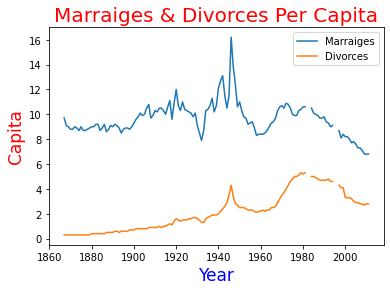

In [65]:
#Q6
import pandas as panda
import matplotlib.pyplot as pplt
data = panda.read_csv(r'C:\Users\Murali\us-marriages-divorces-1867-2014.csv')
data.plot(x = 'Year', y = ['Marriages_per_1000','Divorces_per_1000'],
label = ['Marraiges' , 'Divorces'])
pplt.title('Marraiges & Divorces Per Capita', color = 'Red', fontsize = 20)
pplt.xlabel('Year', color = 'Blue', fontsize = 17)
pplt.ylabel('Capita', color = 'Red', fontsize = 17)
pplt.show()

# Question 7:
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

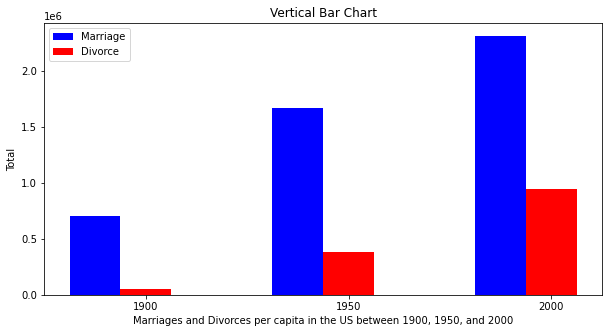

In [66]:
import numpy as np
import matplotlib.pyplot as plt
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 5])
# Data to be plotted
marriage = [709000, 1667000, 2315000]
divorce = [56000, 385000, 944000]

X = np.arange(len(marriage))
plt.bar(X, marriage, color = 'blue', width = 0.25)
plt.bar(X + 0.25, divorce, color = 'red', width = 0.25)
plt.legend(['Marriage', 'Divorce'])
plt.xticks([i + 0.25 for i in range(3)], ['1900', '1950', '2000'])
plt.title("Vertical Bar Chart")
plt.xlabel('Marriages and Divorces per capita in the US between 1900, 1950, and 2000')
plt.ylabel('Total')
plt.show()

# Question 8:
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

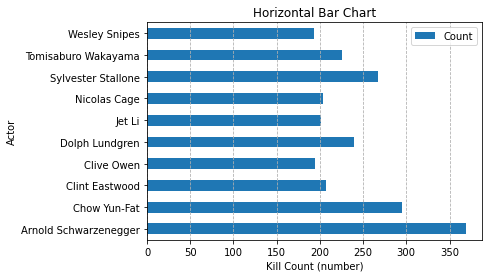

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# read data.csv file into pandas DataFrame object called df
dataframe_Actor = pd.read_csv(r"C:\Users\Murali\actor_kill_counts.csv")

# plot data as horizontal bar graph

dataframe_Actor.plot.barh(x='Actor', y='Count')

# set axis labels
plt.title("Horizontal Bar Chart")
plt.ylabel('Actor')
plt.xlabel('Kill Count (number)')

# show vertical grid lines (optional)
plt.grid(axis='x', linestyle = '--')

# show the plot
plt.show()

# Question 9:
Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [68]:
# Loading the data which is in csv format
# Not loading the libraries as they are loaded already
Roman_Emperors_Reigns = pd.read_csv('roman-emperor-reigns.csv')

In [69]:
# Finding the emperors who were asssasinated
Assassination = Roman_Emperors_Reigns[Roman_Emperors_Reigns.Cause_of_Death == 'Assassinated']
Assassination

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


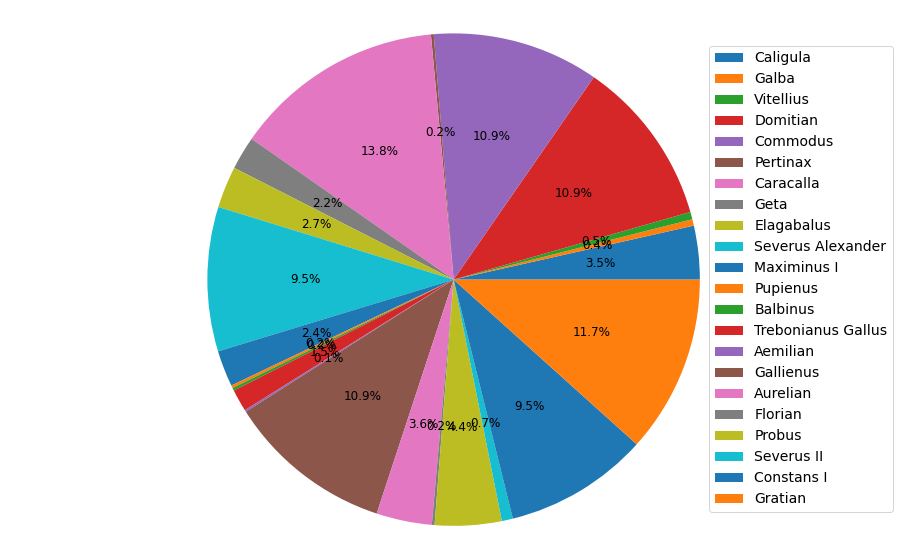

In [75]:
# Plotting the Pie Chart
labels = Assassination.Emperor 
sizes = Assassination.Length_of_Reign
fig, ax = plt.subplots(figsize=(16,10))
plt.pie(sizes, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 12})
plt.axis('equal')
plt.legend( labels, loc="center right", fontsize = 14)
plt.show()

# Question 10:
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

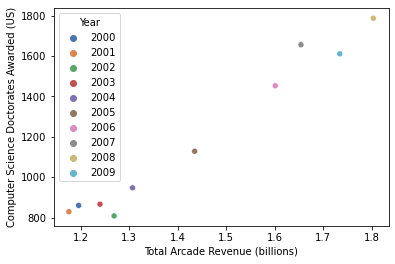

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
arcade_revenuew = pd.read_csv(r"C:\Users\Murali\arcade-revenue-vs-cs-doctorates.csv")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', palette ='deep',data=arcade_revenuew)